In [2]:
import requests
from dotenv import load_dotenv
import os

load_dotenv()

# access football-data.org API
API_KEY = os.getenv('FOOTBALL_DATA_API_KEY')

# endpoint for finished matches for tottenham (id=73) for the 2024-2025 season
url = 'https://api.football-data.org/v4/teams/73/matches?season=2024&status=FINISHED'

# set headers for access
headers = { 'X-Auth-Token': API_KEY }

# retrieve data
response = requests.get(url, headers=headers)



print(response)

487f119082114b74b4a2e2f0f50eaaa6
<Response [200]>


In [2]:
import requests
from dotenv import load_dotenv
import os
import pandas as pd

load_dotenv()

# access football-data.org API
API_KEY = os.getenv('FOOTBALL_DATA_API_KEY')

# endpoint for finished matches for tottenham (id=73) for the 2024-2025 season
url = 'https://api.football-data.org/v4/teams/73/matches?season=2024&status=FINISHED'

# set headers for access
headers = { 'X-Auth-Token': API_KEY }

# retrieve data
response = requests.get(url, headers=headers)

# check that response is ok
if response.status_code == 200:
    print('successful response from football-data')
    data = response.json()

    # grab the relevant data for 'matches'
    match_results = data['matches']

    # create DataFrame
    matches_df = pd.DataFrame([{
        'matchday': match['matchday'], # add matchday for readability
        'tottenham_ft_result': (
            # determine which result corresponds to Tottenham and store the result
            'WIN' if (
                (match['homeTeam']['name'] == 'Tottenham Hotspur FC' and match['score']['winner'] == 'HOME_TEAM') or
                (match['awayTeam']['name'] == 'Tottenham Hotspur FC' and match['score']['winner'] == 'AWAY_TEAM')
            ) else 'DRAW' if match['score']['winner'] == 'DRAW' else 'LOSS'
        )
    } for match in match_results])

    print("\n", matches_df)

    # generate of a count of values in the 'tottenham_ft_result' column
    results_count = matches_df['tottenham_ft_result'].value_counts()

    print("\n", results_count)
else:
    print(f"failed to retrieve data: {response.status_code}")

successful response from football-data

    matchday tottenham_ft_result
0         1                DRAW
1         2                 WIN
2         3                LOSS
3         4                LOSS
4         5                 WIN
5         6                 WIN
6         7                LOSS
7         8                 WIN

 tottenham_ft_result
WIN     4
LOSS    3
DRAW    1
Name: count, dtype: int64


successful response from football-data

    matchday tottenham_ht_result tottenham_ft_result
0         1                 WIN                DRAW
1         2                 WIN                 WIN
2         3                LOSS                LOSS
3         4                DRAW                LOSS
4         5                 WIN                 WIN
5         6                 WIN                 WIN
6         7                 WIN                LOSS
7         8                DRAW                 WIN

 tottenham_ft_result
WIN     4
LOSS    3
DRAW    1
Name: count, dtype: int64


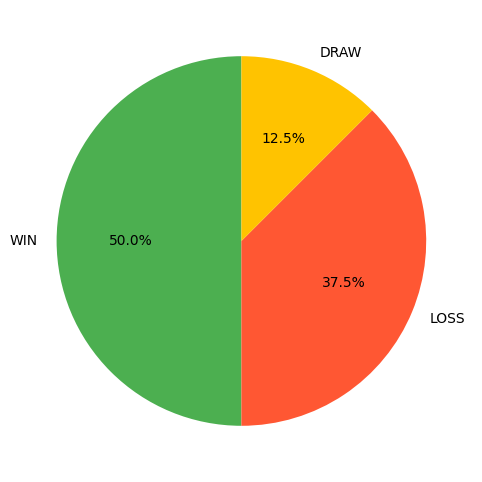

Half time result: WIN 
 tottenham_ft_result
WIN     3
DRAW    1
LOSS    1
Name: count, dtype: int64



 ======================== TOT FT RESULTS (WIN) ======================== 

Matches with 1st half result WIN: 5


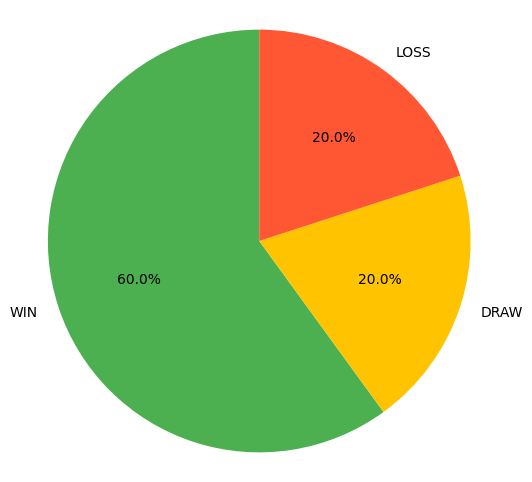

Half time result: LOSS 
 tottenham_ft_result
LOSS    1
Name: count, dtype: int64



 ======================== TOT FT RESULTS (LOSS) ======================== 

Matches with 1st half result LOSS: 1


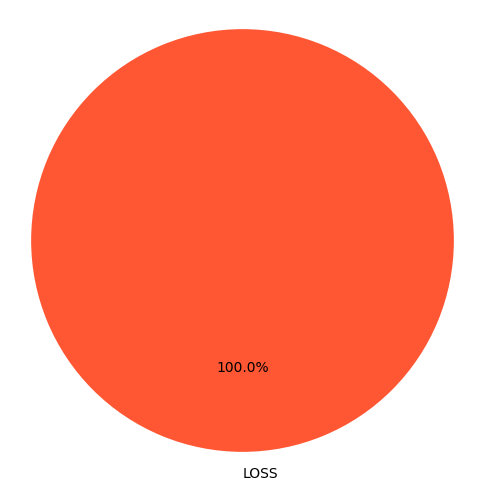

Half time result: DRAW 
 tottenham_ft_result
LOSS    1
WIN     1
Name: count, dtype: int64



 ======================== TOT FT RESULTS (DRAW) ======================== 

Matches with 1st half result DRAW: 2


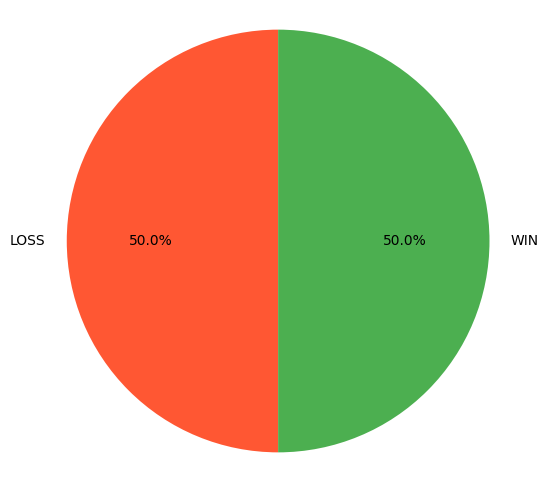

In [4]:
import requests
from dotenv import load_dotenv
import os
import pandas as pd
import matplotlib.pyplot as plt

load_dotenv()

# access football-data.org API
API_KEY = os.getenv('FOOTBALL_DATA_API_KEY')

# endpoint for finished matches for tottenham (id=73) for the 2024-2025 season
url = 'https://api.football-data.org/v4/teams/73/matches?season=2024&status=FINISHED'

# set headers for access
headers = { 'X-Auth-Token': API_KEY }

# retrieve data
response = requests.get(url, headers=headers)

# check that response is ok
if response.status_code == 200:
    print('successful response from football-data')
    data = response.json()

    # grab the relevant data for 'matches'
    match_results = data['matches']

    # create DataFrame
    matches_df = pd.DataFrame([{
        'matchday': match['matchday'], # add matchday for readability
        'tottenham_ht_result': (
            # determine which halftime score corresponds to Tottenham AND
            # determine the result from the score AND
            # store the result as WIN, LOSS or DRAW
            'WIN' if (
                (match['homeTeam']['name'] == 'Tottenham Hotspur FC' and match['score']['halfTime']['home'] > match['score']['halfTime']['away']) or
                (match['awayTeam']['name'] == 'Tottenham Hotspur FC' and match['score']['halfTime']['away'] > match['score']['halfTime']['home'])
            ) else 'DRAW' if match['score']['halfTime']['home'] == match['score']['halfTime']['away'] else 'LOSS'
        ),
        'tottenham_ft_result': (
            # determine which result corresponds to Tottenham and store the result
            'WIN' if (
                (match['homeTeam']['name'] == 'Tottenham Hotspur FC' and match['score']['winner'] == 'HOME_TEAM') or
                (match['awayTeam']['name'] == 'Tottenham Hotspur FC' and match['score']['winner'] == 'AWAY_TEAM')
            ) else 'DRAW' if match['score']['winner'] == 'DRAW' else 'LOSS'
        ),
        'tottenham_ft_result': (
            # determine which result corresponds to Tottenham and store the result
            'WIN' if (
                (match['homeTeam']['name'] == 'Tottenham Hotspur FC' and match['score']['winner'] == 'HOME_TEAM') or
                (match['awayTeam']['name'] == 'Tottenham Hotspur FC' and match['score']['winner'] == 'AWAY_TEAM')
            ) else 'DRAW' if match['score']['winner'] == 'DRAW' else 'LOSS'
        )
    } for match in match_results])

    print("\n", matches_df)

    # generate of a count of values in the 'tottenham_ft_result' column
    results_count = matches_df['tottenham_ft_result'].value_counts()

    print("\n", results_count)

    # create a label for each result
    labels = results_count.index

    # create pie slices corresponding the values (count of each result)
    sizes = results_count.values

    # assign colors to each slice
    colors = ['#4CAF50', '#FF5733', '#FFC300']

    # define the size of the figure
    plt.figure(figsize=(6,6))

    # create pie chart
    plt.pie(
        sizes,
        labels=labels,
        colors=colors,
        autopct='%1.1f%%', # include, and format a percent for each slice
        startangle=90
    )

    # display the plot
    plt.show()


    def plot_results(ht_result):
        '''
        Filter results data frame by halftime result
        Plot a pie for each outcome
        '''
        filtered_df = matches_df[matches_df['tottenham_ht_result'] == ht_result]
        filtered_results_count = filtered_df['tottenham_ft_result'].value_counts()
        print(f"Half time result: {ht_result} \n", filtered_results_count)

        if filtered_results_count.empty:
            print(f'No matches found for Tottenham HT result: {ht_result}')
            return


        labels = filtered_results_count.index
        sizes = filtered_results_count.values
        # colors = ['#4CAF50', '#FF5733', '#FFC300']
        color_map = {'WIN': '#4CAF50', 'LOSS': '#FF5733', 'DRAW': '#FFC300'}
        colors = [color_map[label] for label in labels]

        plt.figure(figsize=(6, 6))
        plt.pie(
            sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90
        )
        plt.axis('equal')

        print(f"\n\n\n ======================== TOT FT RESULTS ({ht_result}) ======================== \n")
        print(f"Matches with 1st half result {ht_result}: {len(filtered_df)}")
        plt.show()

    plot_results('WIN')

    plot_results('LOSS')

    plot_results('DRAW')
else:
    print(f"failed to retrieve data: {response.status_code}")